In [111]:
!pip install requests python-dotenv pillow numpy

In [112]:
img_dict = {}

for i in range(0, 255):
    img_dict[i] = []

In [113]:
import requests
from dotenv import load_dotenv
import os

load_dotenv()
res = requests.get(
    url=os.environ.get("GIPHY_URL"),
    params={
        "api_key": os.environ.get("GIPHY_API_KEY")
    }
)

res

<Response [429]>

In [114]:
image_url = res.json()['data']['images']['original']['url']

TypeError: list indices must be integers or slices, not str

In [115]:
print('image_url : ', image_url)

image_url :  https://media0.giphy.com/media/pHXe7S0l5fKcRlFDsM/giphy.gif?cid=80e5c5037zhiro50hva9kdd0pdgbaj5fn5v6kkma0fkngn3d&ep=v1_gifs_random&rid=giphy.gif&ct=g


In [116]:
res = requests.get(url=image_url)

In [117]:
res.headers

{'Connection': 'keep-alive', 'Content-Length': '1213223', 'Last-Modified': 'Thu, 14 Mar 2019 17:32:33 GMT', 'ETag': '"1eb43659fda3901ebbffd8d576736877"', 'Content-Type': 'image/gif', 'access-control-allow-origin': '*', 'cross-origin-resource-policy': 'cross-origin', 'Accept-Ranges': 'bytes', 'Age': '3243', 'Date': 'Wed, 14 Aug 2024 15:25:53 GMT', 'X-Served-By': 'cache-iad-kjyo7100053-IAD, cache-mad2200145-MAD', 'X-Cache': 'HIT, HIT', 'X-Cache-Hits': '65, 0', 'X-Timer': 'S1723649154.729031,VS0,VE1', 'Strict-Transport-Security': 'max-age=15465600', 'cache-control': 'max-age=86400', 'x-robots-tag': 'noai, noimageai'}

In [118]:
from io import BytesIO

In [119]:
image_data = BytesIO(res.content)

In [120]:
import PIL.Image
import PIL.ImageChops

image = PIL.Image.open(image_data).convert('L')

In [121]:
import PIL.ImageStat

i = PIL.ImageStat.Stat(image)
int((PIL.ImageStat.Stat(image)).mean[0])

63

In [122]:
avg_color = int(i.mean[0])

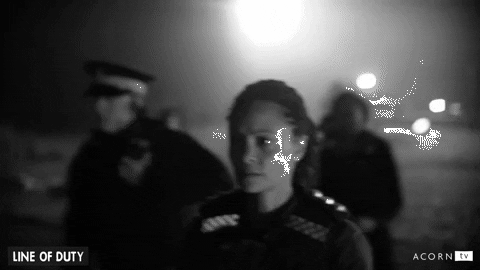

In [123]:
image

In [124]:
img_dict[avg_color].append(image_url)

## create dirs if not exist

In [125]:
# for i in range(0, 255):
#     path = f"./bdd/{i}"
#     os.makedirs(path, exist_ok=True)

# Load an image and resize

In [126]:
image = PIL.Image.open("./images/moicassou.jpg")

In [127]:
gray_image = image.convert("L")

In [128]:
import PIL.Image

width, height = gray_image.size 
new_w = width
new_h = height
resized_img = gray_image.resize([new_w, new_h], resample=PIL.Image.BILINEAR)

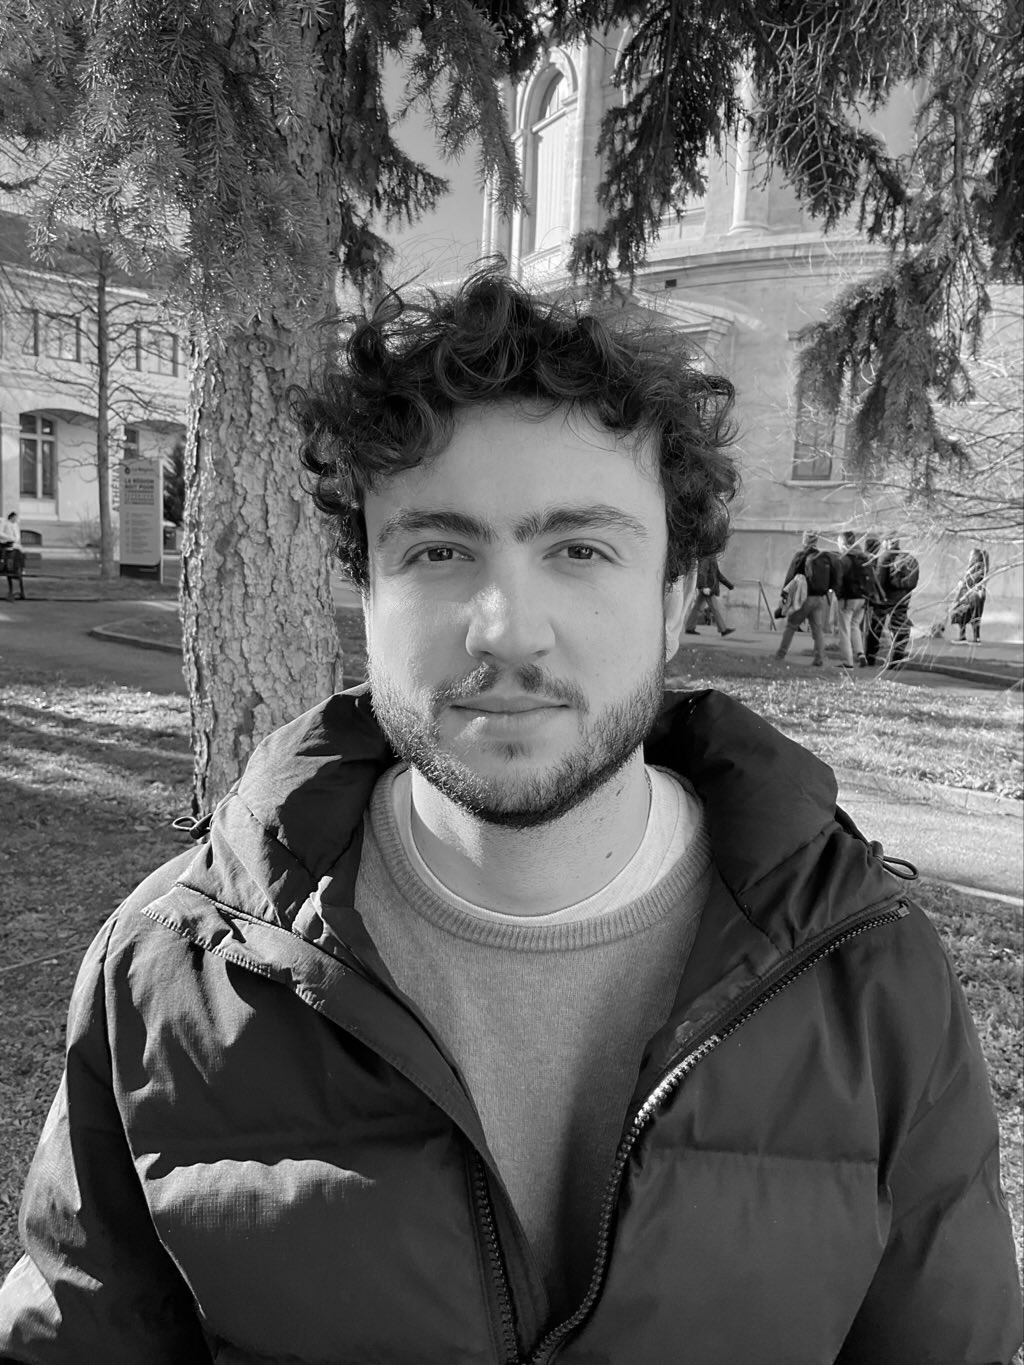

In [129]:
resized_img

In [130]:
import numpy as np
gray_image_arr = np.asarray(resized_img)

In [131]:
gray_image_arr.shape

(1365, 1024)

In [132]:
# remplir tous les pixels par des images de GIF de taille définie
from src.constants import TAILLE_DALLE

output_arr = np.zeros((TAILLE_DALLE * new_w, TAILLE_DALLE * new_h))
print("new_w", new_w)
print("new_h : ", new_h)
print('dims : ', output_arr.shape)

new_w 1024
new_h :  1365
dims :  (10240, 13650)


In [133]:
def load_img_from_url(url):
    res = requests.get(url=url, timeout=5)
    image_data = BytesIO(res.content)
    image = PIL.Image.open(image_data).convert("L")
    return image

In [134]:
import json
from tqdm import tqdm

with open("./image_bdd.json", 'r') as input:
    dict_url = json.load(input)
    for i in tqdm(range(new_w), desc="Processing rows"):
        for j in tqdm(range(new_w), desc="Processing columns", leave=False):
            value = gray_image_arr[i, j]
            if len(dict_url[str(gray_image_arr[i, j])]) > 0:
                # il existe une image
                # remplacer la nouvelle image par celle-ci
                # prendre une image au pif
                index = np.random.randint(len(dict_url[str(gray_image_arr[i,j])]))
                # remplacer les pixels
                image = load_img_from_url(dict_url[str(gray_image_arr[i, j])][index]).resize((TAILLE_DALLE,  TAILLE_DALLE))
                output_arr[i*TAILLE_DALLE:(i+1)*TAILLE_DALLE, j*TAILLE_DALLE:(j+1)*TAILLE_DALLE] = image
            else:
                output_arr[i*TAILLE_DALLE:(i+1)*TAILLE_DALLE, j*TAILLE_DALLE:(j+1)*TAILLE_DALLE] = 0
print("output_arr : ", output_arr)

Processing rows:   1%|▏         | 15/1024 [1:41:53<114:14:06, 407.58s/it]


ConnectTimeout: HTTPSConnectionPool(host='media2.giphy.com', port=443): Max retries exceeded with url: /media/gFcRGbbxHWPMwLMhom/giphy.gif?cid=80e5c503ixgn1r17u4f4q0u3qyeuv02lpfwyo5p7ltszwqzy&ep=v1_gifs_random&rid=giphy.gif&ct=g (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x0000025A524C8C20>, 'Connection to media2.giphy.com timed out. (connect timeout=5)'))

In [135]:
img_output = PIL.Image.fromarray(output_arr)

In [136]:
img_output.show()

In [137]:
img_output.save('./images/output.gif')